# Python for Fantasy Football - APIs and JSON Data

Welcome to part 4 of the Python for Fantasy Football series! As always, if you missed any of the previous parts, go back and check those out first before reading any further. In part 3 I mentioned that your first port of call when looking to access data on a website should be the API (if there is one). I said last week that I wasn't going to scrape the FPL site, but thanks to all the excellent feedback (keep it coming!) I have since found out that the site does in fact have an API. There is no documentation and the API isn't publicly listed anywhere as far as I can tell, which makes me think that it's not primarily intended for public use. However, there are already plenty of guides around showing people how to access it, so since we will be using JSON files later in the series I thought I would do a quick run-through of how to do so in Python. It goes without saying that this data should not be used commercially, as stated in the site terms and conditions.

## Introduction to JSON
JSON (JavaScript Object Notation) is a text file format designed to facilitate the transmission of data from server to browser. Whilst initially intended to be used with JavaScript, there are libraries for creating and parsing JSON data in many of the most popular programming languages. The structure is similar to a nested Python dictionary, as you can see from the example below (via [Wikipedia](https://en.wikipedia.org/wiki/JSON)):

{
  "firstName": "John",
  "lastName": "Smith",
  "isAlive": true,
  "age": 27,
  "address": {
    "streetAddress": "21 2nd Street",
    "city": "New York",
    "state": "NY",
    "postalCode": "10021-3100"
  },
  "phoneNumbers": [
    {
      "type": "home",
      "number": "212 555-1234"
    },
    {
      "type": "office",
      "number": "646 555-4567"
    },
    {
      "type": "mobile",
      "number": "123 456-7890"
    }
  ],
  "children": [],
  "spouse": null
}

The FPL API has several JSON files that you can access, provided that you are logged in to the site (see [here](https://www.oddsonfpl.com/how-to-get-data-from-the-fantasy-premier-league-api/) for an exhaustive list; note that you will need to be a league member or have authorisation to view some of these). I'll go through a brief run-down of how to read JSON data into Python and access the pieces of information you want, showing you a few examples from the FPL API. To finish, I'll look at player ownership in a mini-league to give an idea of what you can do with the data.

## Loading JSON files into Python
To load JSON files into Python, we can use the 'json' library. We'll also need to use 'requests' first to grab the data from the FPL API. The code below shows a standard function that you should be able to use to get any JSON file from the web, provided you have a link to it.

In [140]:
import pandas as pd
import json
import requests
from pandas.io.json import json_normalize
import seaborn as sns
from matplotlib import pyplot as plt

# Define a function to get info from the FPL API and save to the specified file_path
# It might be a good idea to navigate to the link in a browser to get an idea of what the data looks like
def get_json(file_path):
    r = requests.get('https://fantasy.premierleague.com/drf/bootstrap')
    jsonResponse = r.json()
    with open(file_path, 'w') as outfile:
        json.dump(jsonResponse, outfile)

# Run the function and choose where to save the json file
get_json('D:/Tom/Downloads/fpl.json')

# Open the json file and print a list of the keys
with open('D:/Tom/Downloads/fpl.json') as json_data:
    d = json.load(json_data)
    print(list(d.keys()))

['elements', 'total-players', 'player', 'element_types', 'watched', 'next-event', 'phases', 'stats', 'game-settings', 'current-event', 'teams', 'stats_options', 'last-entry-event', 'entry', 'next_event_fixtures', 'events']


## Parsing JSON
We can see that this file has several keys, each corresponding to a different subset of the data. Feel free to play around with each of these if you like, but I’ll give you a few examples of the most useful parts here. To get player information, we need to access the ‘elements’ key. We could write some code to parse this out manually, but luckily the ‘json_normalize’ function makes things a lot easier for us:

In [141]:
# See https://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.json.json_normalize.html
df = json_normalize(d['elements'])
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df.head())

Columns:
 ['assists', 'bonus', 'bps', 'chance_of_playing_next_round', 'chance_of_playing_this_round', 'clean_sheets', 'code', 'cost_change_event', 'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall', 'creativity', 'dreamteam_count', 'ea_index', 'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name', 'form', 'goals_conceded', 'goals_scored', 'ict_index', 'id', 'in_dreamteam', 'influence', 'loaned_in', 'loaned_out', 'loans_in', 'loans_out', 'minutes', 'news', 'news_added', 'now_cost', 'own_goals', 'penalties_missed', 'penalties_saved', 'photo', 'points_per_game', 'red_cards', 'saves', 'second_name', 'selected_by_percent', 'special', 'squad_number', 'status', 'team', 'team_code', 'threat', 'total_points', 'transfers_in', 'transfers_in_event', 'transfers_out', 'transfers_out_event', 'value_form', 'value_season', 'web_name', 'yellow_cards'] 

Dataframe Head:
    assists  bonus  bps  chance_of_playing_next_round  \
0        0      3  130                       

You can see that it’s not that difficult to get all the player info we would want from the FPL site! As for teams, that’s just as easy:

In [142]:
df = json_normalize(d['teams'])
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df.head())

Columns:
 ['code', 'current_event_fixture', 'draw', 'form', 'id', 'link_url', 'loss', 'name', 'next_event_fixture', 'played', 'points', 'position', 'short_name', 'strength', 'strength_attack_away', 'strength_attack_home', 'strength_defence_away', 'strength_defence_home', 'strength_overall_away', 'strength_overall_home', 'team_division', 'unavailable', 'win'] 

Dataframe Head:
    code                              current_event_fixture  draw  form  id  \
0     3  [{'is_home': True, 'day': 22, 'event_day': 3, ...     0  None   1   
1    91  [{'is_home': True, 'day': 20, 'event_day': 1, ...     0  None   2   
2    36  [{'is_home': False, 'day': 20, 'event_day': 1,...     0  None   3   
3    90  [{'is_home': False, 'day': 20, 'event_day': 1,...     0  None   4   
4    97  [{'is_home': True, 'day': 20, 'event_day': 1, ...     0  None   5   

  link_url  loss         name  \
0              0      Arsenal   
1              0  Bournemouth   
2              0     Brighton   
3              0   

If you’ve ever wondered how they get the fixture difficulty ratings, you might find the answer in there. In case you aren’t familiar with how bonus points are calculated, you can take a look at the game settings:

In [143]:
# The (not so) secret sauce (see https://www.premierleague.com/news/106533)
df = json_normalize(d['game-settings'])
print('Columns:\n', list(df), '\n')

Columns:
 ['element_type.1.bps_clean_sheets', 'element_type.1.bps_goals_scored', 'element_type.1.scoring_clean_sheets', 'element_type.1.scoring_goals_conceded', 'element_type.1.scoring_goals_scored', 'element_type.1.squad_max_play', 'element_type.1.squad_min_play', 'element_type.1.squad_select', 'element_type.1.sub_positions_locked', 'element_type.1.ui_shirt_specific', 'element_type.2.bps_clean_sheets', 'element_type.2.bps_goals_scored', 'element_type.2.scoring_clean_sheets', 'element_type.2.scoring_goals_conceded', 'element_type.2.scoring_goals_scored', 'element_type.2.squad_max_play', 'element_type.2.squad_min_play', 'element_type.2.squad_select', 'element_type.3.bps_clean_sheets', 'element_type.3.bps_goals_scored', 'element_type.3.scoring_clean_sheets', 'element_type.3.scoring_goals_conceded', 'element_type.3.scoring_goals_scored', 'element_type.3.squad_max_play', 'element_type.3.squad_min_play', 'element_type.3.squad_select', 'element_type.4.bps_clean_sheets', 'element_type.4.bps_g

As well as the above, there are other links we can access. Here is an example of how to get the standings for a particular league – in this case the overall standings. We could use the function from earlier, but to avoid having to download the JSON file and save it to disk we can use a much shorter piece of code:

In [144]:
d = json.loads(requests.get('https://fantasy.premierleague.com/drf/leagues-classic-standings/313').text)
print('Keys:\n', list(d.keys()), '\n')
df = json_normalize(d['standings'])
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df.head())

Keys:
 ['new_entries', 'league', 'standings', 'update_status'] 

Columns:
 ['has_next', 'number', 'results'] 

Dataframe Head:
    has_next  number                                            results
0      True       1  [{'id': 2856139, 'entry_name': 'FC Teo d'Or', ...


Hmm, not quite what we were after; the values we want are all inside the ‘results’ column. Instead, we can access the results key directly in json_normalize to parse out the league standings:

In [145]:
# See json_normalize documentation for further info
df = json_normalize(d['standings'], 'results')
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df.head())

Columns:
 ['entry', 'entry_name', 'event_total', 'id', 'last_rank', 'league', 'movement', 'own_entry', 'player_name', 'rank', 'rank_sort', 'start_event', 'stop_event', 'total'] 

Dataframe Head:
      entry            entry_name  event_total        id  last_rank  league  \
0   589232           FC Teo d'Or           49   2856139          1     313   
1  2557010             InSané FC           51  13987896          2     313   
2    64137  Kad Jaganjci Uskisnu           52    302116          5     313   
3  2754458          Gary Doherty           53  15214329         16     313   
4    53944       2 girls 1 Klopp           48    252757          8     313   

  movement  own_entry         player_name  rank  rank_sort  start_event  \
0     same      False  Teodor Steen Luisa     1          1            1   
1     same      False  Brayden McCullough     2          2            1   
2       up      False  Miroslav Milošević     3          3            1   
3       up      False      Sam Wilm

As far as team names go this is a bit of a poor effort in my opinion! You can also see the data for your own team if you like by using the code below:

In [146]:
d = json.loads(requests.get('https://fantasy.premierleague.com/drf/entry/5746258').text)
print('Keys:\n', list(d.keys()), '\n')
df = json_normalize(d['entry'])
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df.head())

Keys:
 ['entry', 'leagues'] 

Columns:
 ['bank', 'current_event', 'deleted', 'email', 'event_transfers', 'event_transfers_cost', 'extra_free_transfers', 'favourite_team', 'id', 'joined_seconds', 'joined_time', 'kit', 'name', 'player', 'player_first_name', 'player_last_name', 'player_region_id', 'player_region_name', 'player_region_short_iso', 'started_event', 'strategy', 'summary_event_points', 'summary_event_rank', 'summary_overall_points', 'summary_overall_rank', 'total_loans', 'total_loans_active', 'total_transfers', 'transfers_or_loans', 'value'] 

Dataframe Head:
    bank  current_event  deleted  email  event_transfers  event_transfers_cost  \
0    14              9    False  False                0                     0   

   extra_free_transfers  favourite_team       id  joined_seconds  ...    \
0                     0              13  5746258           85556  ...     

  strategy summary_event_points summary_event_rank  summary_overall_points  \
0     None                   27 

You will notice that my team is terrible! I actually didn’t play FPL this season, so this is just a random team I made to allow me to write this article. When FantasyBet were offering a real-money version with only 3808 entries it was hard to get excited for the free game, especially when the prize-pool looks like this:

![fantasybet](http://www.fantasyfutopia.com/wp-content/uploads/2018/10/fantasybet-prizepool.png)

If you missed it, don’t worry! [FantasyBet](https://record.affiliates.fantasybet.com/_shfBFIGxLsPUOsjNOfgKeZKZ26VHNjHp/1/) also offer daily fantasy games where you can pick a team for just one gameweek and compete for cash prizes. Make sure to check them out if you haven't already!

## FPL Mini-League Ownership
Accessing the data is just the tip of the iceberg, and people have already made some pretty cool Python scripts to do all sorts of things using the API. For example, see [here](https://github.com/spinach/FantasyPremierLeague-Api.py/tree/python3) for a script that allows you to find out captain choices and overall player ownership for a specific gameweek in any mini-league! I actually edited the script slightly to clean up the player names and automatically calculate ownership percentages; you can find it on my GitHub [here](https://github.com/twhelan22/FantasyPremierLeague-Api.py). You can run this script from the command line as suggested in the readme, or alternatively you can run a script inside a Jupyter notebook using the method below:

In [130]:
# Note that this code might not work if you aren't in this league... I suggest replacing the league ID with one of your own mini-leagues
# If you pick a league with lots of players, this will take a while!
import os
filepath='C:/Users/Tom/Python/36/FantasyPremierLeague-Api.py-python3'
# Change directory to the filepath
os.chdir(filepath)
# Run Python script with specified paramaters
%run playersPickedInLeague.py --league 14226 --gameweek 9 --type classic

classic league mode
parsing pageCount: 1 with total number of players so far: 50
parsing pageCount: 2 with total number of players so far: 100
parsing pageCount: 3 with total number of players so far: 150
parsing pageCount: 4 with total number of players so far: 200
parsing pageCount: 5 with total number of players so far: 250
parsing pageCount: 6 with total number of players so far: 300
parsing pageCount: 7 with total number of players so far: 350
parsing pageCount: 8 with total number of players so far: 400
parsing pageCount: 9 with total number of players so far: 450
parsing pageCount: 10 with total number of players so far: 500
parsing pageCount: 11 with total number of players so far: 550
parsing pageCount: 12 with total number of players so far: 600
parsing pageCount: 13 with total number of players so far: 650
parsing pageCount: 14 with total number of players so far: 700
parsing pageCount: 15 with total number of players so far: 750
parsing pageCount: 16 with total number of pl

The script will create two csv files in the same directory, one with captain ownership and another with overall player ownership for the particular gameweek. As a side note, if you haven’t already checked out the [FISO forums](http://fiso.co.uk/forum/viewforum.php?f=18), they are a great resource for fantasy football, particularly FPL. If you load the files you will see a breakdown of ownership percentages for the FISO forum mini-league in gameweek 9:

In [132]:
# Note that you will need to update the league id and gw number here to match your input paramaters
captain = pd.read_csv(filepath + '/captain_14226_gw9.csv')
picked = pd.read_csv(filepath + '/picked_14226_gw9.csv')

print('The FISO forum mini-league captains, GW9:\n', captain.head(), '\n')
print('The FISO forum mini-league player ownership, GW9:\n', picked.head())

The FISO forum mini-league captains, GW9:
               name  count   percent
0    Sergio Aguero    808  0.613050
1       Harry Kane    112  0.084977
2    Mohamed Salah     96  0.072838
3      Eden Hazard     77  0.058422
4  Raheem Sterling     54  0.040971 

The FISO forum mini-league player ownership, GW9:
                      name  count   percent
0             Eden Hazard   1077  0.817147
1       Aaron Wan-Bissaka   1021  0.774659
2           Sergio Aguero    966  0.732929
3           Marcos Alonso    865  0.656297
4  Richarlison de Andrade    672  0.509863


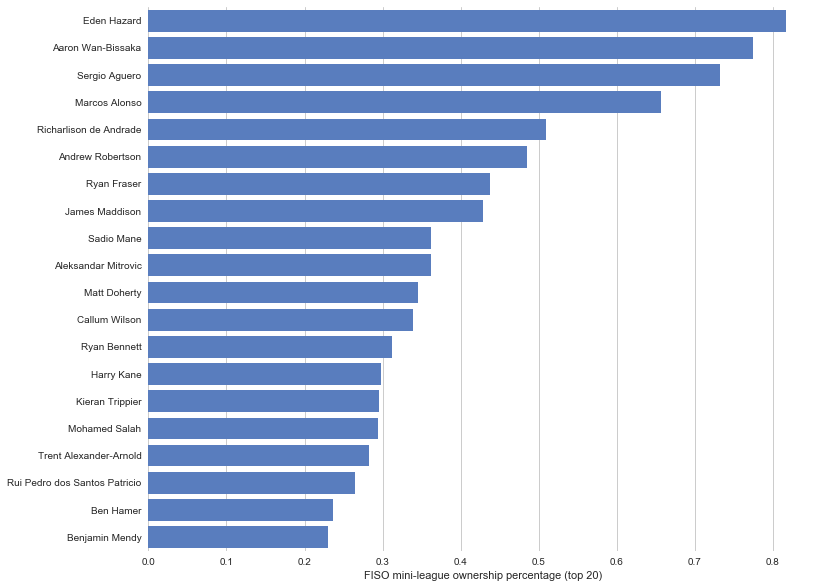

In [139]:
# Plot the top 20 owned players
sns.set(style='whitegrid')
sns.set_color_codes('muted')
f, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x='percent', y='name', data=picked.head(20), color='b')
ax.set(ylabel='', xlabel='FISO mini-league ownership percentage (top 20)')
sns.despine(left=True, bottom=True)

## Conclusion
That’s it for now! Hopefully the last part of the article has given you some ideas of the things you could create using the FPL API. Make sure to share any tools or visualisations in the comments here, or on Twitter [@FantasyFutopia](http://www.twitter.com/FantasyFutopia) or [@tom_whelan](http://www.twitter.com/tom_whelan)! The next part might take a little bit longer to write, but hopefully the wait will be worth it! I’ll be publishing the first of several articles on machine learning, looking at how you can create your own xG models in Python.

If you enjoyed the article, please don’t forget to share it on social media – it really helps!